# Customer Churn Prediction

## Problem Statement

The Thera bank recently saw a steep decline in the number of users of their credit card.<br>
Customers’ leaving credit card services would lead the bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and the reason for same – so that the bank could improve upon those areas.

We as a Data Scientist at Thera Bank need to explore the data provided, identify patterns, and come up with a classification model to identify customers likely to churn, and provide actionable insights and recommendations that will help the bank improve its services so that customers do not renounce their credit cards.

## Data Description

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: The gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in the 4th quarter and the total transaction count in the 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in the 4th quarter and the total transaction amount in the 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

### Import libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# to split the data into train and test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import(
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

#evaluation metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,   
    auc,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)

#Tuning
from sklearn.model_selection import GridSearchCV

#impute needed
from sklearn.impute import SimpleImputer


#pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin



In [2]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 250)

#show only 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

#ignore User warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

### Read data

In [3]:
cust_data_df = pd.read_csv('data/BankChurners.csv')
cust_data_df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [4]:
print(f'BankChurners CSV file has {cust_data_df.shape[0]} rows and {cust_data_df.shape[1]} columns ')

BankChurners CSV file has 10127 rows and 21 columns 


In [5]:
df = cust_data_df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

In [8]:
df.describe(include='object').T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

#### Observations

- Numerical features have different range of values. so scaling is mandatory before building models
- Outliers seems to be present for few features like Customer Age, Avg Open To Buy as there is huge difference between minimum and maximum values.
- Dataset has mostly existing customers - data is imbalanced
- Most customers in dataset have Blue Category cards

In [9]:
df['CLIENTNUM'].nunique()

10127

In [10]:
#drop CLIENTNUM identifier column from dataset as it contains all unique values
#will not help in identifying patterns
df.drop('CLIENTNUM',axis=1,inplace=True)

## Data Preprocessing

In [11]:
num_cols = df.select_dtypes(np.number).columns
num_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [12]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

#### Check for missing values

In [13]:
percent_null_df = df.isnull().sum()/len(df) * 100
percent_null_df[percent_null_df>0]

Education_Level   15.000
Marital_Status     7.396
dtype: float64

Education_Level   and Marital_Status columns has null values.
Replace them as 'Unknown' 

In [14]:
df['Education_Level'].fillna('Unknown',inplace=True)
df['Marital_Status'].fillna('Unknown',inplace=True)

#### Check for duplicate values

In [15]:
df[df.duplicated()]

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

No duplicates

#### Check unique values

In [16]:
df[cat_cols].nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [17]:
for col in cat_cols:
    print(df[col].value_counts())
    print('*'*50)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
**************************************************
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
**************************************************
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
******

#### Observations:<br>
All categorical features have expected values except Income Category with few values as abc. These will be treated as Unknown

In [18]:
df['Income_Category'].replace('abc','Unknown',inplace=True)
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

## Exploratory Data Analysis

## Univariate Analysis

### Numeric Features
We will look at continuous and discrete valued numeric features separately

#### Distribution of Continuous features

In [19]:
def visualise_continuous_features(df,col):
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
  
    
    plt.suptitle(f'Distribution of {col} ')
    
    
    sns.histplot(df,x=col,ax = ax1,kde=True,color='#c963b1');
    sns.boxplot(df,x=col,ax = ax2,color='#f8ecac',showmeans=True);
    
      
  

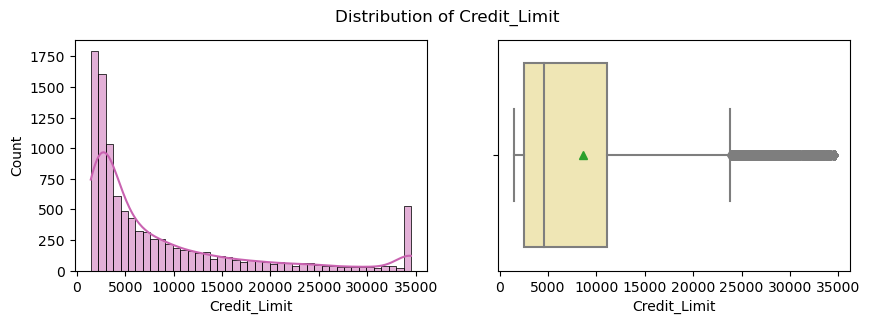

In [20]:
visualise_continuous_features(df,'Credit_Limit')

Credit Limit feature is rightly skewed with many outliers on the higher end.<br>
This indicates dataset has many customers who spend a higher than average amount(high end customers)

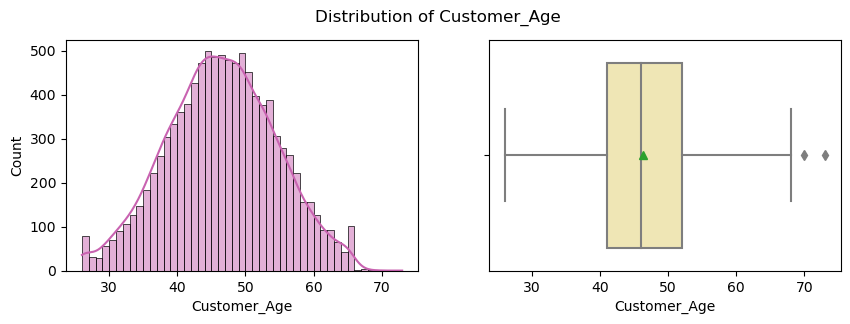

In [21]:
visualise_continuous_features(df,'Customer_Age')

Distribution for Customer Age is normal. Couple of outliers on the higher side again. <br>
Data indicates more customers are in the range of 40 to 50 years.

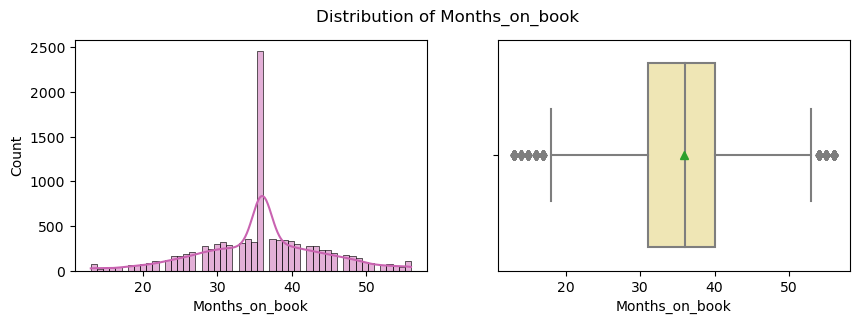

In [22]:
visualise_continuous_features(df,'Months_on_book')

Most customers have Months on Book = 36 ie. they are associated with the bank for 3 years.<br>
Outliers are on both upper and lower ends

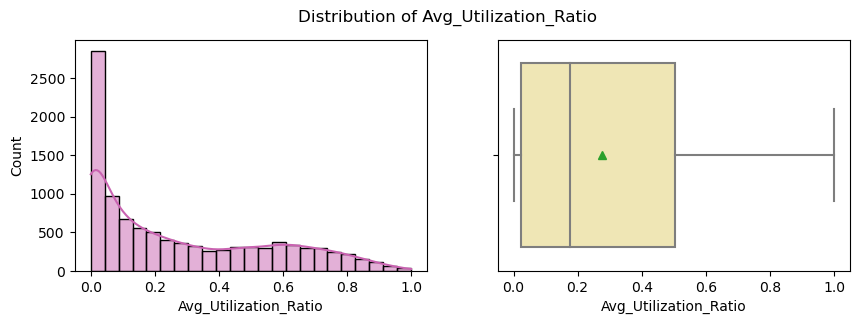

In [23]:
visualise_continuous_features(df,'Avg_Utilization_Ratio')

Most customers have Avg Utiliaztion Ratio = 0. This indicates that most customers do not spend any of the available credit

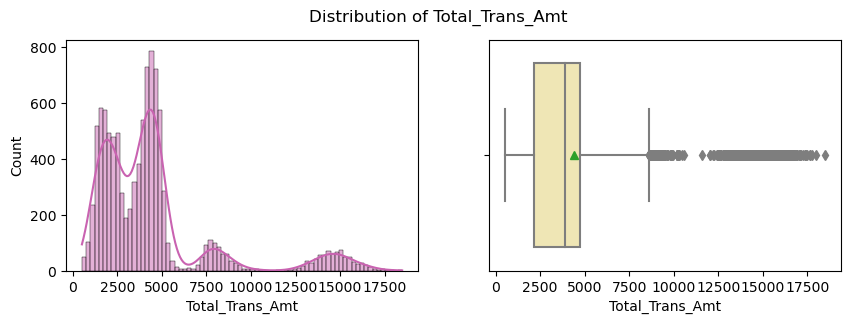

In [24]:
visualise_continuous_features(df,'Total_Trans_Amt')

Most customers spend less than 5K$. Outliers indicate few customers who spend amounts greater than 10K

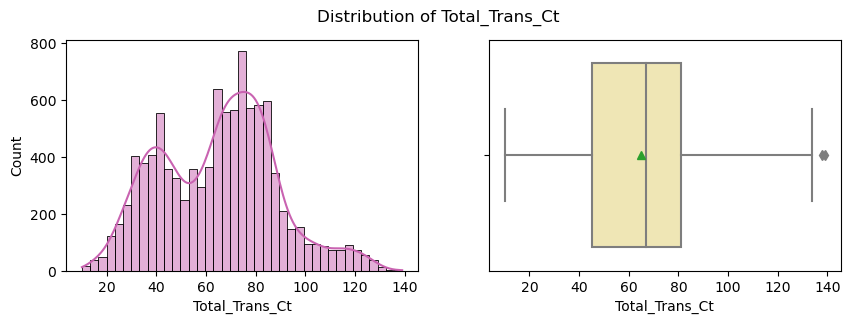

In [25]:
visualise_continuous_features(df,'Total_Trans_Ct')

Total Transaction Count distribution indicates most customers conduct between 40 to 80 transactions.

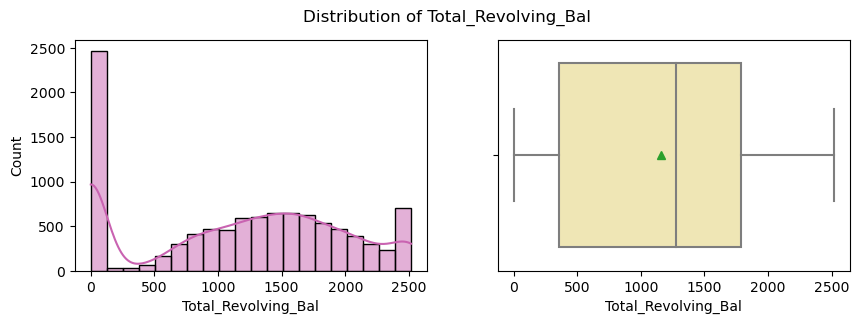

In [26]:
visualise_continuous_features(df,'Total_Revolving_Bal')

Most customers have Total Revolving Balance =0 indicating they do not use their credit cards.

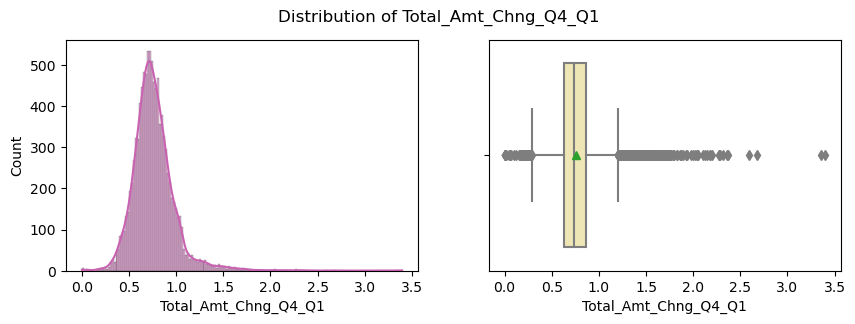

In [27]:
visualise_continuous_features(df,'Total_Amt_Chng_Q4_Q1')

Distribution for Total_Amt_Chng_Q4_Q1 is right skewed with outliers on both upper and lower ends.<br>
Most customers have this ration between 0.5 and 1 indicating most customers spend atleast half or amount in Q4 than they spent in Q1

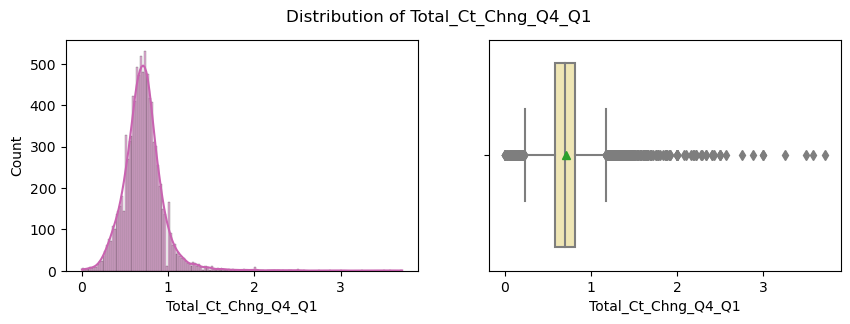

In [28]:
visualise_continuous_features(df,'Total_Ct_Chng_Q4_Q1')

Distribution for Total_Ct_Chng_Q4_Q1 is right skewed with outliers on both upper and lower ends.<br>
Most customers have this ration closer 1 indicating most customers conduct same number of transaction in Q4 and Q1

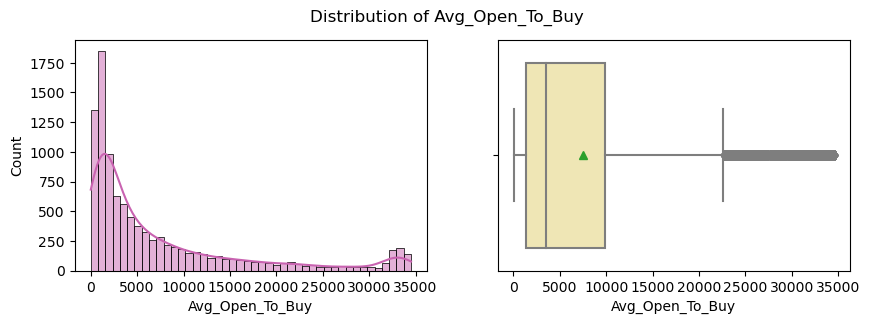

In [29]:
visualise_continuous_features(df,'Avg_Open_To_Buy')

Avg_Open_To_Buy - Data is right skewed with outliers on the upper end i.e. customers who do not spend most of their credit limit

#### Distribution of Discrete valued features

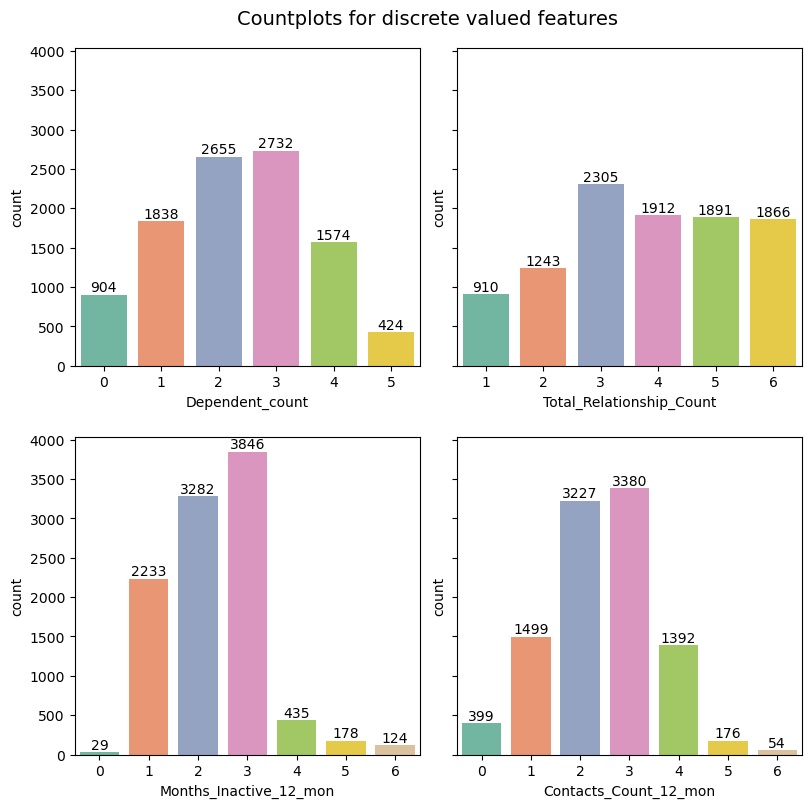

In [30]:
cols = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
fig,ax = plt.subplots(2,2,figsize=(8,8),sharey=True)

fig.suptitle('Countplots for discrete valued features',size=14)
fig.tight_layout(h_pad=3)

row_num,col_num = 0,0

for col in cols:
    sns.countplot(df,x=col,ax = ax[row_num,col_num],palette = "Set2") 
    ax[row_num,col_num].bar_label(ax[row_num,col_num].containers[0])
    
    col_num+=1
    if col_num == 2:
        col_num=0
        row_num+=1

#### Observations:

- Most customers have 2 or 3 dependents
- Most customers have more than 3 relationships with the bank
- Most customers have been inactive for 3 months or less
- Most customers have been in contact for 3 or less times. There are around 400 customers who have not been in touch with the bank

### Categorical Features

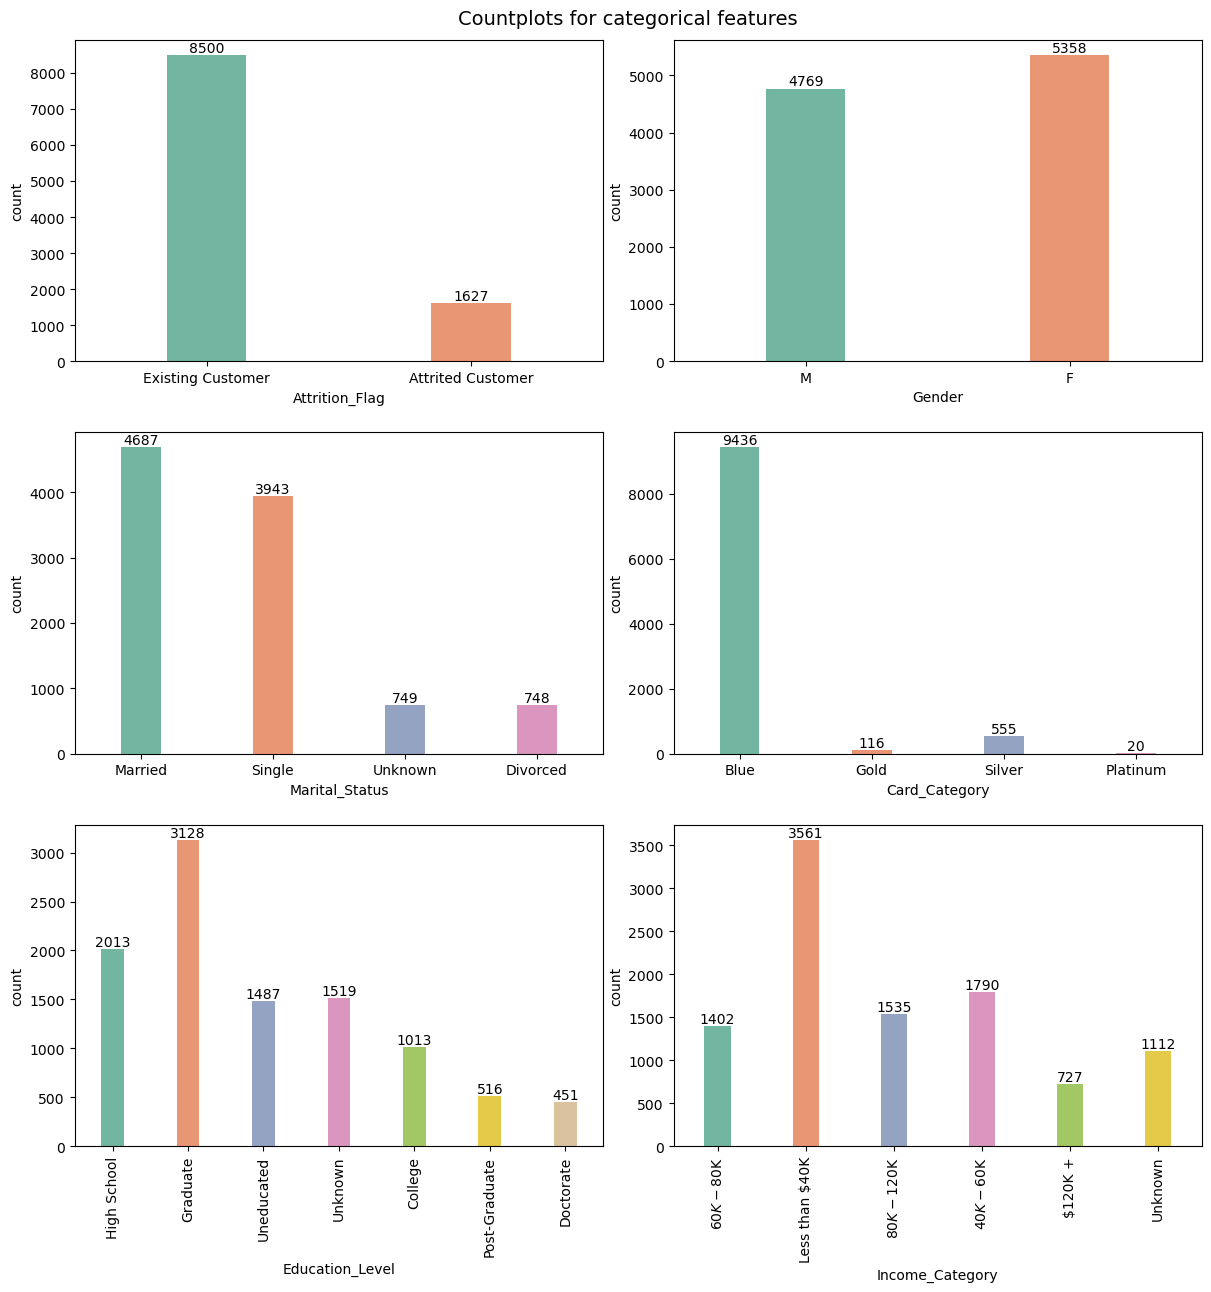

In [31]:
cat_cols = ['Attrition_Flag', 'Gender','Marital_Status', 'Card_Category', 'Education_Level', 'Income_Category']
fig,ax = plt.subplots(3,2,figsize=(12,12))

fig.suptitle('Countplots for categorical features',size=14)
fig.tight_layout(h_pad=3,w_pad=2)

row_num,col_num = 0,0

for i,col in enumerate(cat_cols):
    sns.countplot(df,x=col,ax = ax[row_num,col_num],width=0.3,palette = "Set2") 
    ax[row_num,col_num].bar_label(ax[row_num,col_num].containers[0])
    #ax[row_num,col_num].set_title(col,size=10)
    
    if col in ['Education_Level','Income_Category']:
              
        for label in ax[row_num,col_num].get_xticklabels():
            label.set_rotation(90)
        
        
    else:
        ax[row_num,col_num].tick_params(axis='x', which='minor', labelsize='medium')
    
    col_num+=1
    if col_num == 2:
        col_num=0
        row_num+=1
        
    

#### Observations:

    - Attrited_Flag has more records of Existingcustomers (data is imbalanced)
    - Almost equal number of male and female customers
    - Most customers are either Married or Single
    - Most customers have Blue credit cards
    - Most customers are well educated with Graduate or higher education level.Around 1500 customer's education level is not known
    - Most customers have income of less than 40K $. Around 1112 customers' income detail is not known

## Bivariate Analysis

### Relationship between numeric features and target

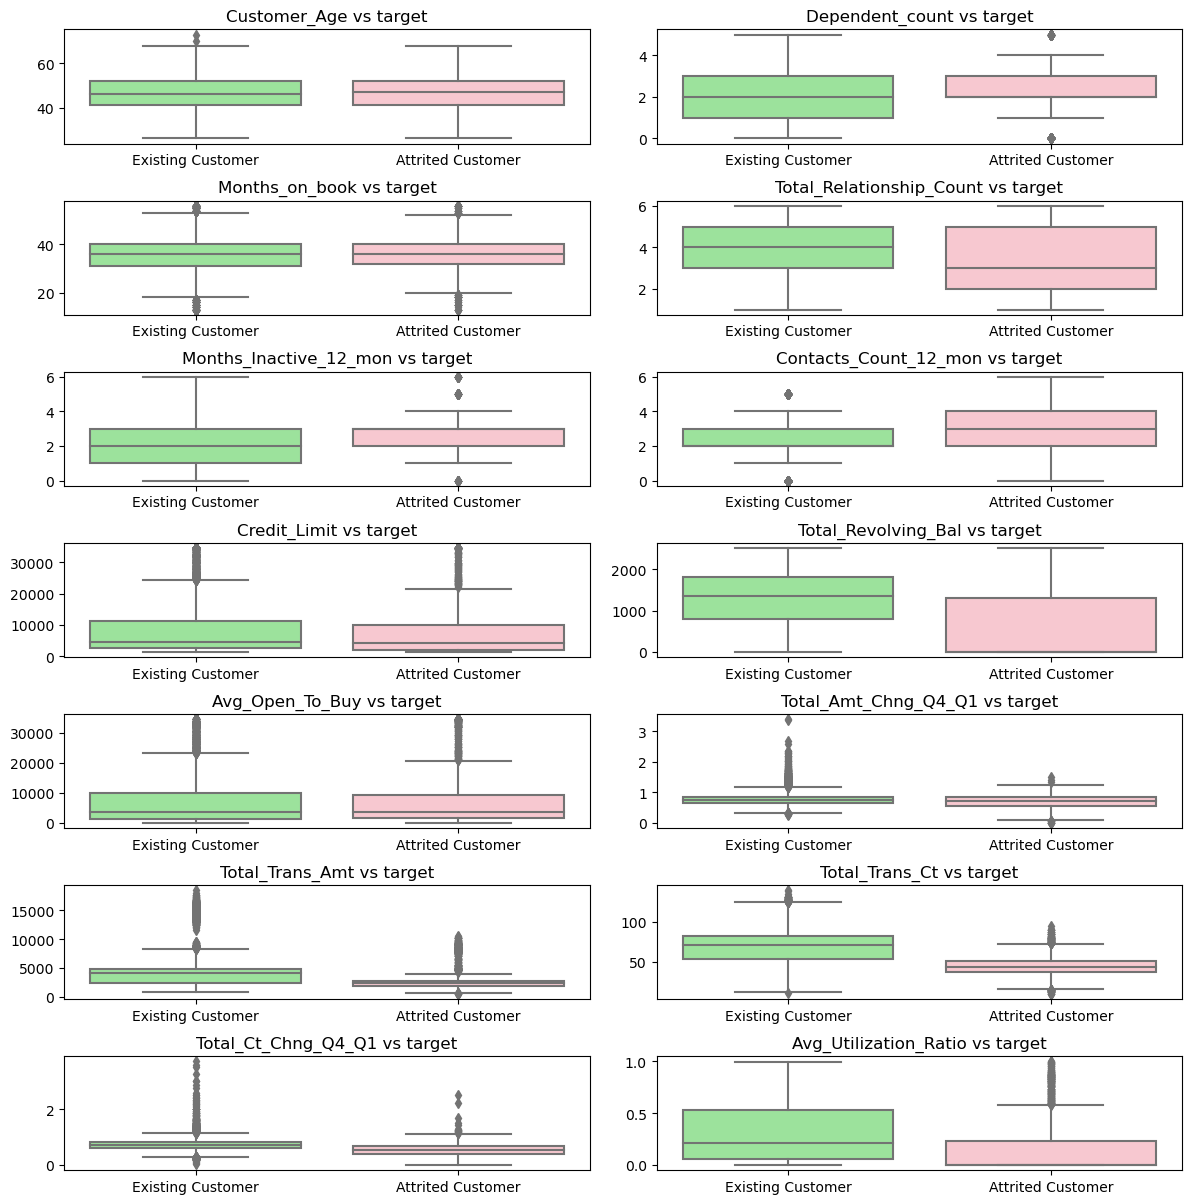

In [32]:
#colormap

color_map = {'Existing Customer':'lightgreen','Attrited Customer':'pink'}


fig,ax = plt.subplots(7,2,figsize=(12,12))

#fig.suptitle('Relationship between numeric features and Attrited Flag',size=14)
plt.subplots_adjust(top=0.9)   
fig.tight_layout(h_pad=2)
#fig.tight_layout()
row_num,col_num = 0,0

for i,col in enumerate(num_cols):
    ax1 = ax[row_num,col_num]
    sns.boxplot(df,x='Attrition_Flag', y = col,ax = ax1,palette=color_map) 
    ax1.set_title(f'{col} vs target',size=12)
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    #ax[row_num,col_num].bar_label(ax[row_num,col_num].containers[0])
    
      
    col_num+=1
    if col_num == 2:
        col_num=0
        row_num+=1
     
    

#### Observations:

- There is no change in distribution for an Exisiting or Attrited customer for *Customer Age,Months on Book, Avg Open to Buy* features. <br>So these will not be considered in model building
- Attrited customers tend to have:
    - less Relationship with bank
    - more inactive months in general
    - less transaction amount and less number of transactions
    - lower or higher than average utilization ratio
    - lower revolving balance
    


### Relationship between categorical features and target

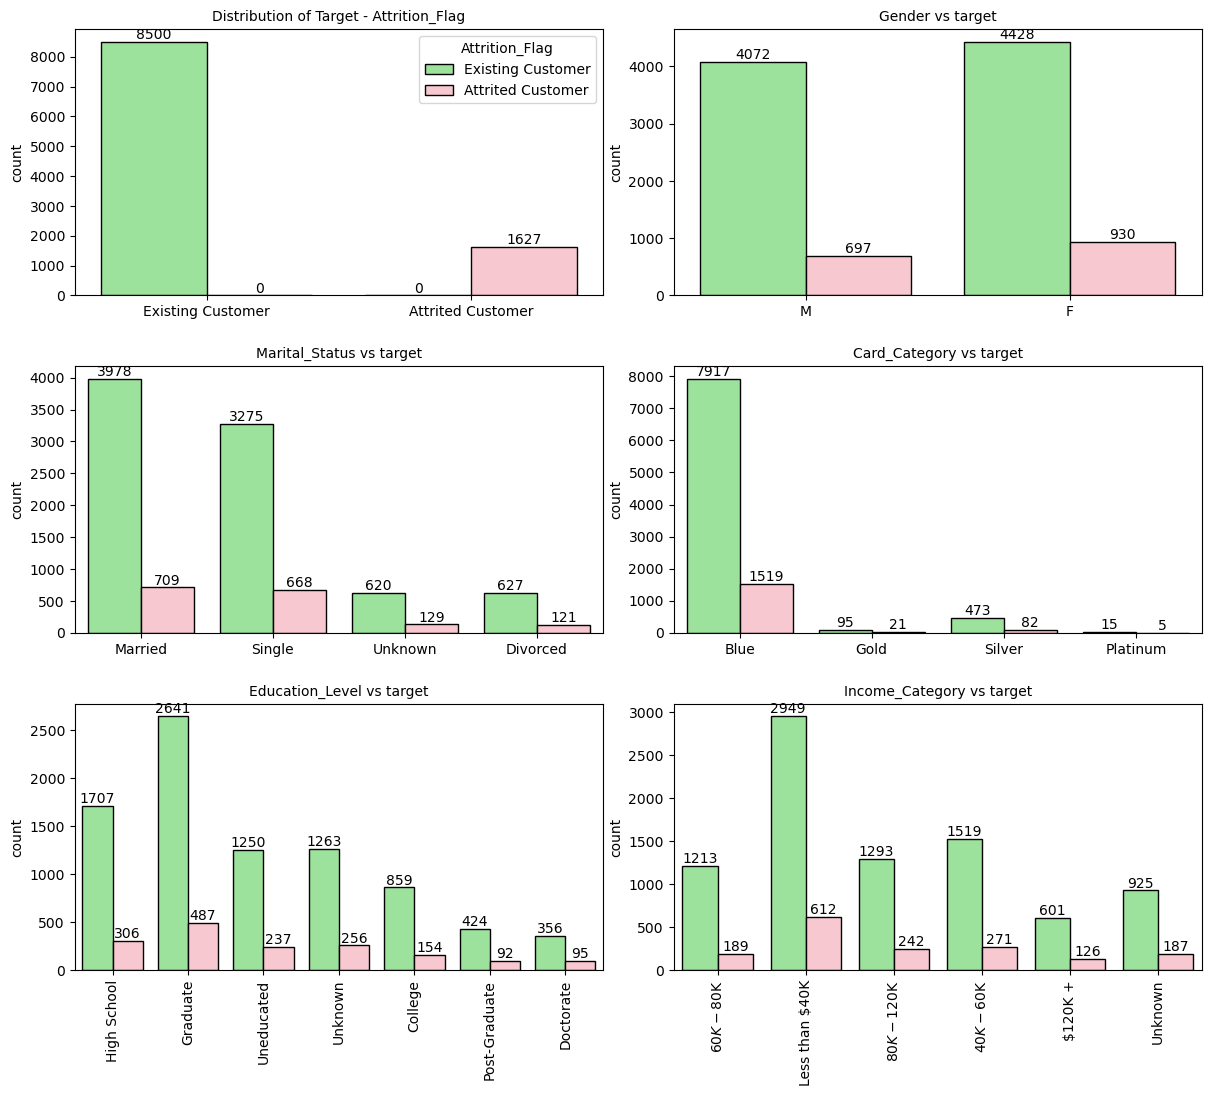

In [33]:
fig,ax = plt.subplots(3,2,figsize=(12,10))

#fig.suptitle('Relationship between categorical features and target')
plt.subplots_adjust(top=0.9)   
fig.tight_layout(h_pad=3,w_pad = 2)

row_num,col_num = 0,0

for i,col in enumerate(cat_cols):
        
    current_ax = ax[row_num,col_num]
    sns.countplot(df,x = col, hue="Attrition_Flag",ax = current_ax ,palette=['lightgreen', 'pink'],edgecolor=['black'])
    current_ax.set_xlabel('')
    
    current_ax.bar_label(current_ax.containers[0])
    current_ax.bar_label(current_ax.containers[1])
    if col != 'Attrition_Flag':
        current_ax.set_title(f'{col} vs target',size=10)
        current_ax.get_legend().remove()
        
    else:
        current_ax.set_title(f'Distribution of Target - {col}',size=10)
           
    if col in ['Education_Level','Income_Category']:
              
        for label in current_ax.get_xticklabels():
            label.set_rotation(90)
    
    col_num+=1
    if col_num == 2:
        col_num=0
        row_num+=1
        

####  Observations

 Attrited customers are mostly
   - married or single
   - have income less than 40K
   - have a Graduate level education
   - Blue card

### Income Category vs Card Category

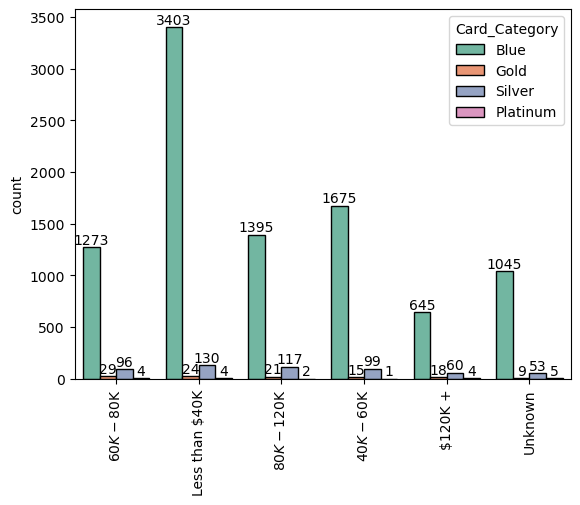

In [34]:
current_ax = sns.countplot(df,x = 'Income_Category', hue='Card_Category',edgecolor=['black'],palette = 'Set2')
current_ax.set_xlabel('')

for idx,container in enumerate(current_ax.containers):
    current_ax.bar_label(current_ax.containers[idx])


for label in current_ax.get_xticklabels():
            label.set_rotation(90)

        

Blue Category cards are most preferred followed by Silver and Gold across all income groups

### Multivariate Analysis

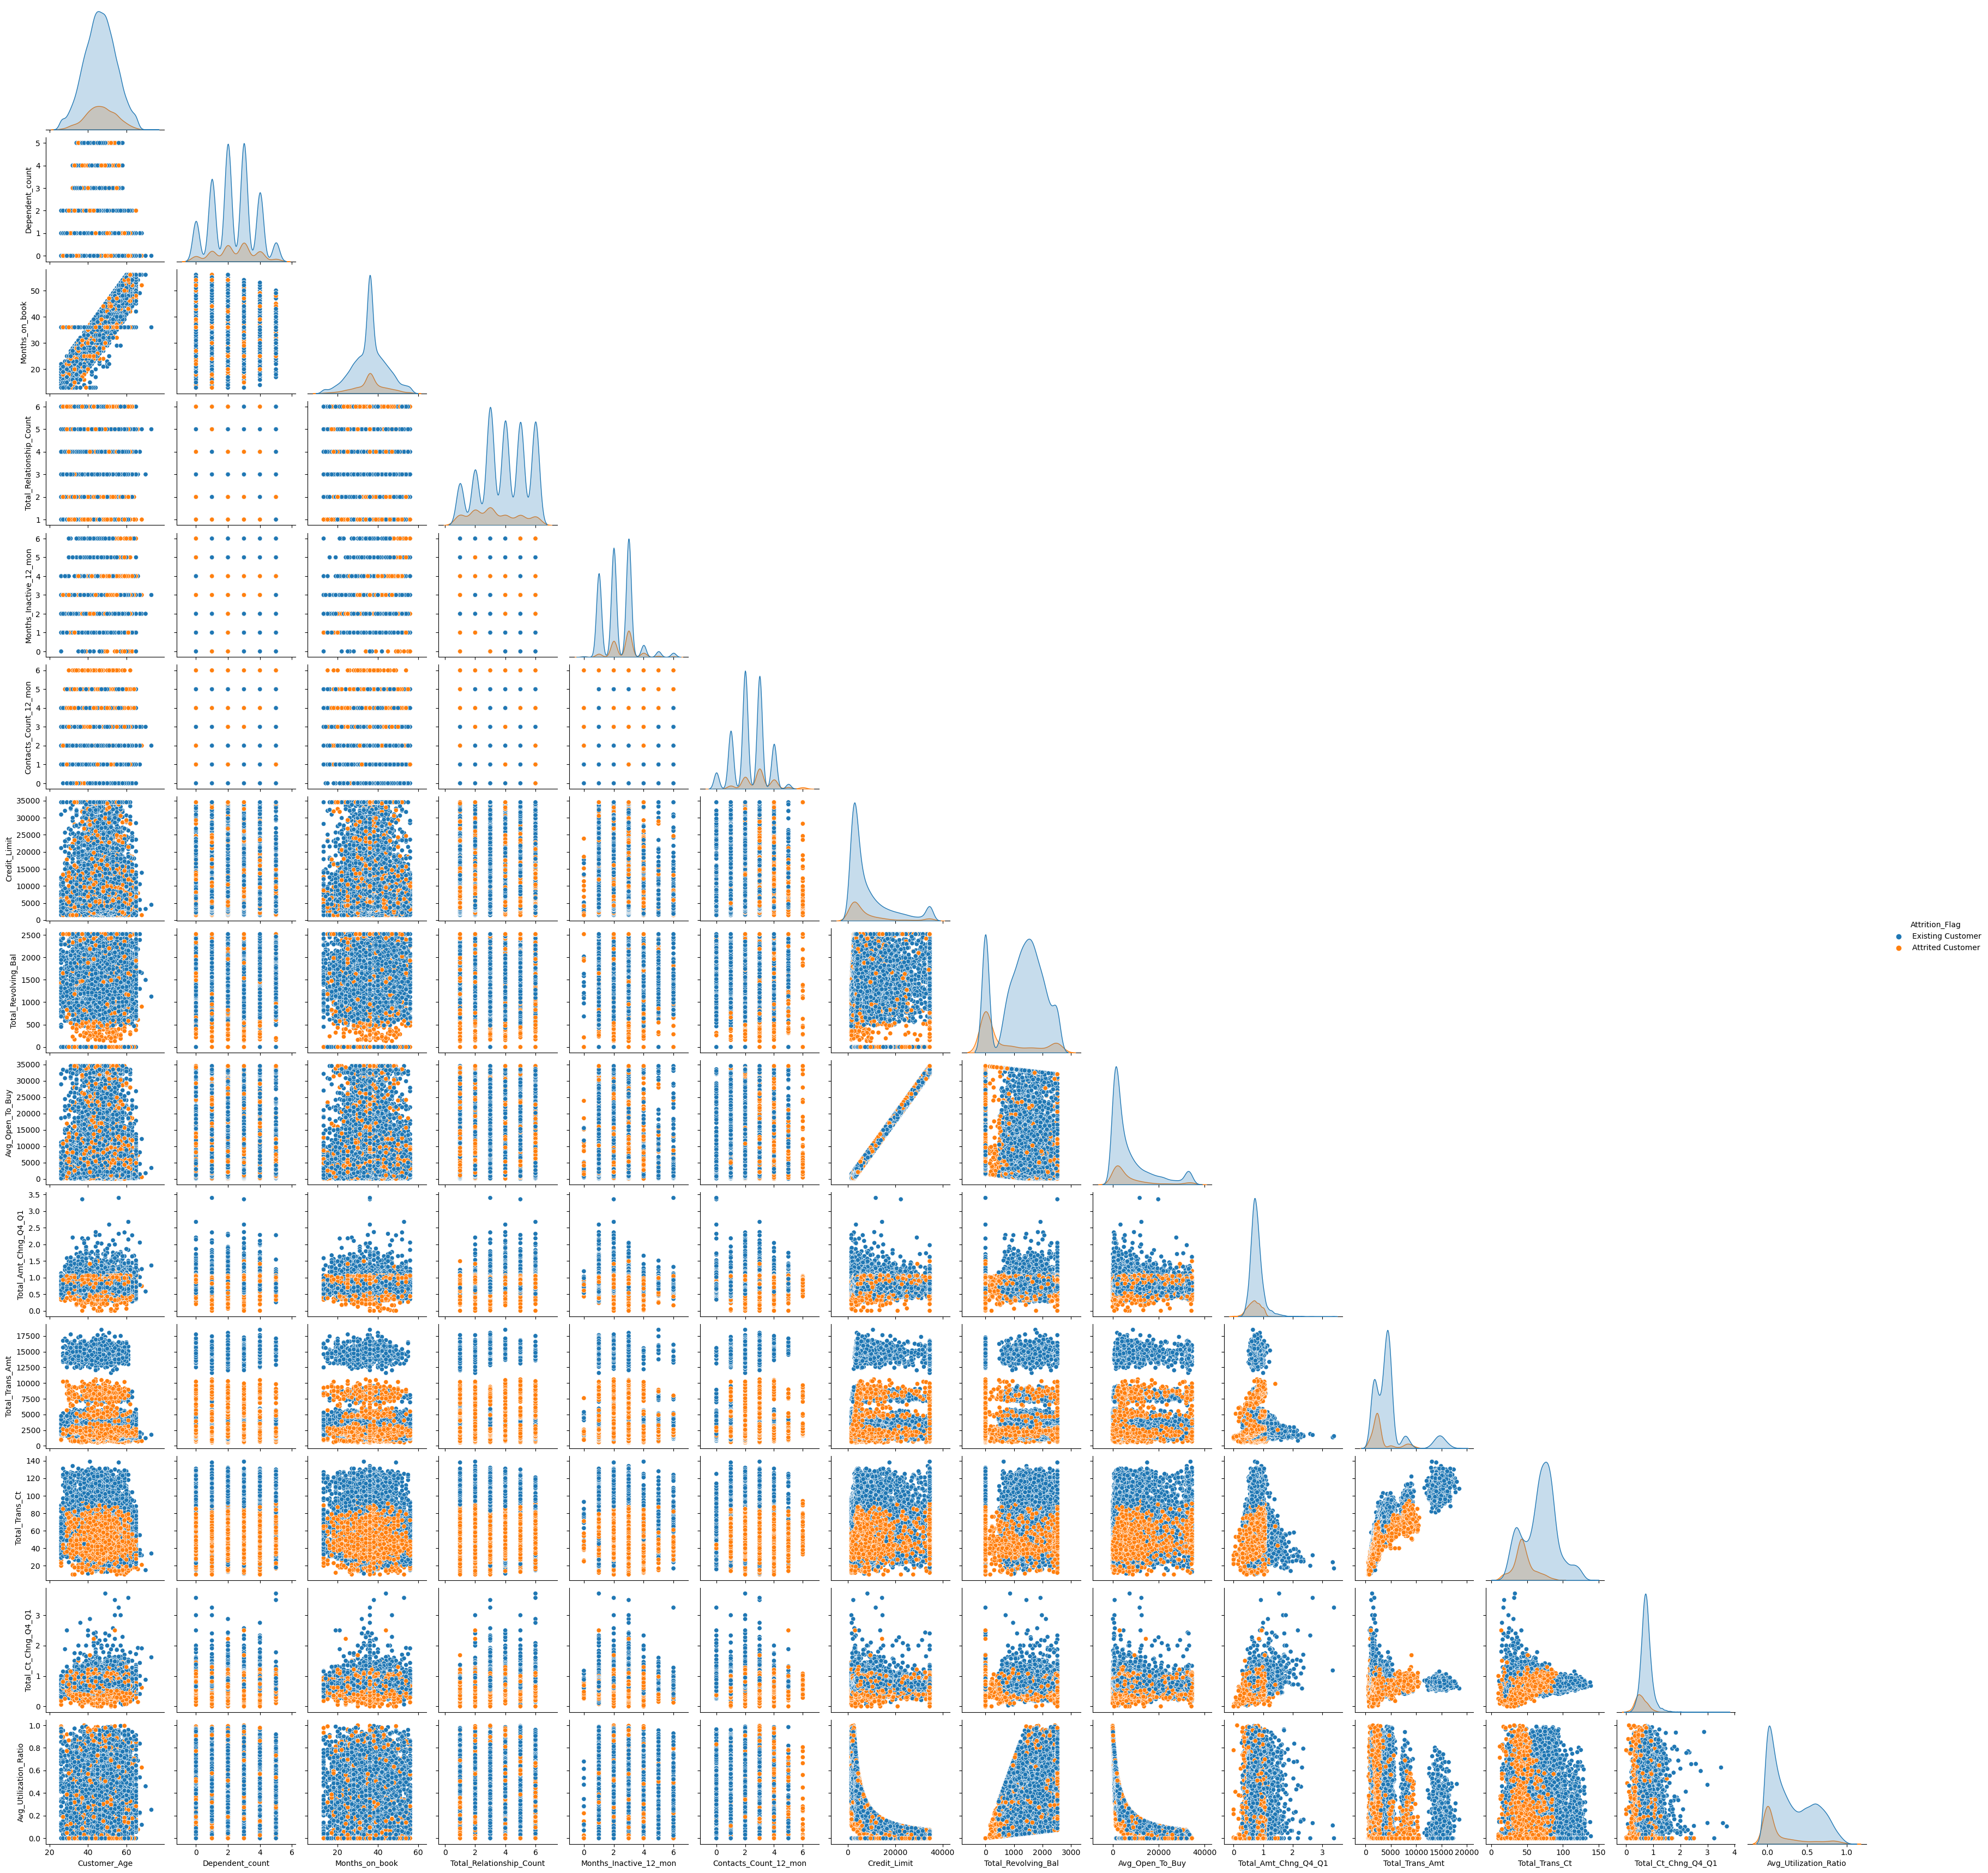

In [35]:
#visualise the linear correlation between features
sns.pairplot(df,diag_kind='kde',hue='Attrition_Flag',corner=True);
plt.show()

#### Observations:

- Credit_Limit and Average_Open_To_Buy are highly correlated. Only one of them should be considered for model building
- Clear clusters are seen for Total Transaction Count and Total Transaction Amount indicating these are probably good candidates for building model
- Total Transaction Count and Total Transaction Amount are highly correlated
- Total_Ct_Chng_Q4_Q1 and Total_Amt_Chng_Q4_Q1 alse seem to be correlated


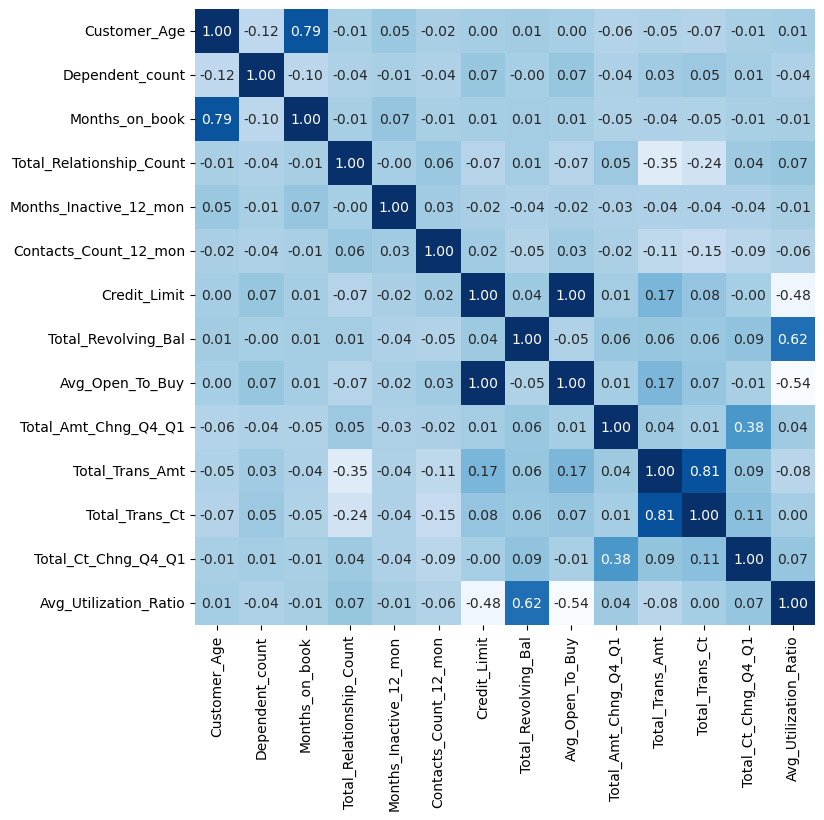

In [36]:
#Check linear correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),cbar=False,annot=True,fmt='0.2f',cmap='Blues');

#### Observations:

 Highly correlated pairs of features: (only one to be considered in case of linear model building):
- Months on Book and Customer Age ( both will be dropped as not impacting the target feature as highlighted above)
- Total Transaction Amount and Total Transaction Count
- Total Revolving Balance and Average Utilization Ratio


## Data Preprocessing

Before building the model, we need to do below steps:

- drop irrelevant features based on above analysis
    - includes columns that have no impact on target('Customer_Age','Months_on_book','Avg_Open_To_Buy')
    - feature with high linear correlation are considered as we are only considering tree based models(these do not have any assumptions regarding data)    
- change all categorical features from object type to category type
- apply one hot encoding for all categorical features except Attrited_Flag
- identify Attrited_Flag as target and all other features as independent features

**Note on Outliers**:<br>
Due to limited number of observations in this dataset, all outliers have been retained.
Most of the outliers with regards to amount spent are treated to be from high spend transactions and hence not a true outlier

In [37]:
cols_to_drop = ['Customer_Age','Months_on_book','Avg_Open_To_Buy']

def add_modify_features(df):
    
    df.drop(cols_to_drop,axis=1,inplace=True)
    
    df[cat_cols] = df[cat_cols].astype('category')
    
       
    return df   
    

In [38]:
#apply changes
df = add_modify_features(df)

In [39]:
#update numeric cols list
num_cols = df.select_dtypes(np.number).columns
num_cols

Index(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [40]:
df.shape

(10127, 17)

In [41]:
# apply one hot encoding
ohe_cols = ['Gender', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category']
df_encoded = pd.get_dummies(df,columns = ohe_cols,dtype='int8')
df_encoded.head()

Attrition_Flag  Dependent_count  Total_Relationship_Count  \
0  Existing Customer                3                         5   
1  Existing Customer                5                         6   
2  Existing Customer                3                         4   
3  Existing Customer                4                         3   
4  Existing Customer                3                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                  777                 1.335             1144              42   
1                  864                 1.541             1291              33   
2                    0                 2.594             1887              20   
3                 2517                 1.405             1171              20   
4                    0                 2.175              816              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  Gender_M  \
0                1.625                  0.061         0         1   
1                3.714                  0.105         1         0   
2                2.333                  0.000         0         1   
3                2.333                  0.760         1         0   
4                2.500                  0.000         0         1   

   Education_Level_College  Education_Level_Doctorate  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Education_Level_Unknown  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       1   
1                        0                        0                       0   
2                        0                        0                       1   
3                        0                        0                       0   
4                        0                        0                       1   

   Marital_Status_Single  Marital_Status_Unknown  Income_Category_$120K +  \
0                      0                       0                        0   
1                      1                       0                        0   
2                      0                       0                        0   
3                      0                       1                        0   
4                      0                       0                        0   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                            0                            1   
1                            0                            0   
2                            0                            0   
3                        

In [42]:
df_encoded.shape
#new columns added as part of encoding

(10127, 35)

### Split Data to Train, Validation and Test

In [43]:
#STATIC VARIABLES

TEST_SIZE = 0.2
FOLDS = 10
SEED = 42

#manual encode for target
cust_attrite_map = {'Existing Customer':0,'Attrited Customer':1}

In [44]:
#Attrition_Flag will be target column
#all columns from original data except CLIENT_NUM will be independent features
X = df_encoded.drop('Attrition_Flag',axis=1)

y = df['Attrition_Flag'].map(cust_attrite_map)

In [45]:
#Split data into temp and test, further split temp to train and validation
X_temp, X_test, y_temp, y_test = train_test_split(X,y, random_state = SEED, stratify = y, test_size=TEST_SIZE)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp, random_state = SEED,
                                                      stratify = y_temp, test_size = TEST_SIZE)

In [46]:
#use StandardScaler for scaling numeric vaues
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
#define  shapes of train,validation and test data
print(f'\nTrain set shape\n{X_train.shape}\nValidation set shape\n{X_valid.shape}\nTest set shape\n{X_test.shape}\n')


Train set shape
(6480, 34)
Validation set shape
(1621, 34)
Test set shape
(2026, 34)



## Model Experiment Space

### Base Models and Metric Selection

We will consider the original data (without up or down sampling) to build base models.<br>
For building the models and comparing the performance, we will use Cross Validation with 10 folds against the validation data to avoid data leakage.
All metrics and CV Results will be captured and compared together in the end. <br>

We will consider below models:

- BaggingClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier
- XGBClassifier
- DecisionTreeClassifier
    

### Considerations:
**Metrics Selection**

Classifier models can make two types of errros:

- Predicting a customer will churn/attrite and customer stays (False Positive):

    Bank may reach out to customers who were not leaving with offers and schemes, may lead to loss of resources
 
- Predicting a customer will not churn/attrite and customer churns (False Negative)

    Bank will most likely not take any action. Lost oppurtunity for sales/marketing team to reach out and prevent customer churn. 
    

Reducing *False Positive* cases must be prioritised as this will lead to Loss of business.


We will use **Recall** as the evaluating metrics since not identifying a customer that can attrite/churn as non-churn can cause loss of business to bank. All efforts must be made to retain such customers. <br>


**Model Evaluation**

Above base models will be built and evaluated. We will look to build models that have a high Recall value


**Data Imbalance**<br>
Dataset has higher number of existing customers. Our case of interest are those who have attrited. So such customers will be classified as label 1. <br>
Therefor target will have majority of label 0 and the class of interest (class 1) will be less in number.<br>
This leads to data imbalance which can be handled by oversampling or under sampling the data.



### Helper Methods

In [48]:
def evaluate_clf(model,model_label,X_train,y_train,cv_results):
    
    '''
        Evaluates the given model, against the given train data.
        Performs cross valiation against validation data
    
        Returns: the Pandas dataframe containing train and validation metrics 
        and the mean CV score
    
    '''
    
    #Perform CV
    skfold = StratifiedKFold(
        n_splits=FOLDS, shuffle=True, random_state=SEED
    )  

    
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring="recall", cv=skfold
    )
    cv_results.append(cv_result)
    
    
    #fit the model and find predictions for train and validation sets
    model.fit(X_train,y_train)
    
    y_preds_train = model.predict(X_train)
    y_preds = model.predict(X_valid)
    
        
    perf_df = pd.DataFrame(
        {'Accuracy Train':accuracy_score(y_train,y_preds_train),
         'Precision Train':precision_score(y_train,y_preds_train,average='macro'),
         'Recall Train':recall_score(y_train,y_preds_train,average='macro'),
         'F1 Score Train':f1_score(y_train,y_preds_train,average='macro'),
         'Accuracy Test':accuracy_score(y_valid,y_preds),
         'Precision Test':precision_score(y_valid,y_preds,average='macro'),
         'Recall Test':recall_score(y_valid,y_preds,average='macro'),
         'F1 Score Test':f1_score(y_valid,y_preds,average='macro'),
         'CV Score Mean':cv_result.mean()
         },
    index=[model_label])
    
        
    return perf_df

### Base Models

In [49]:
models = []  # Empty list to store all the model names and model instances
cv_results_main = [] # Empty list to store CV results

main_perf_df = pd.DataFrame() # Empty DataFrame to store metrics


# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=SEED)))
models.append(("RandomForest", RandomForestClassifier(random_state=SEED)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=SEED)))
models.append(("Adaboost", AdaBoostClassifier(random_state=SEED)))
models.append(("Xgboost", XGBClassifier(random_state=SEED)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=SEED)))

#evaluate each model and save metrics in common datatrame

for name,model in models:
    perf_df = evaluate_clf(model,name,X_train,y_train,cv_results_main)
    main_perf_df = pd.concat([main_perf_df,perf_df])
   

#### Compare model performance

In [50]:
#display all metrics
#highight min and max values in each column
main_perf_df.sort_values(by = ['Recall Test','CV Score Mean'],ascending=False
        ).style.highlight_max(color="lightgreen", axis=0).highlight_min(color="pink", axis=0)

#### Compare CV Scores

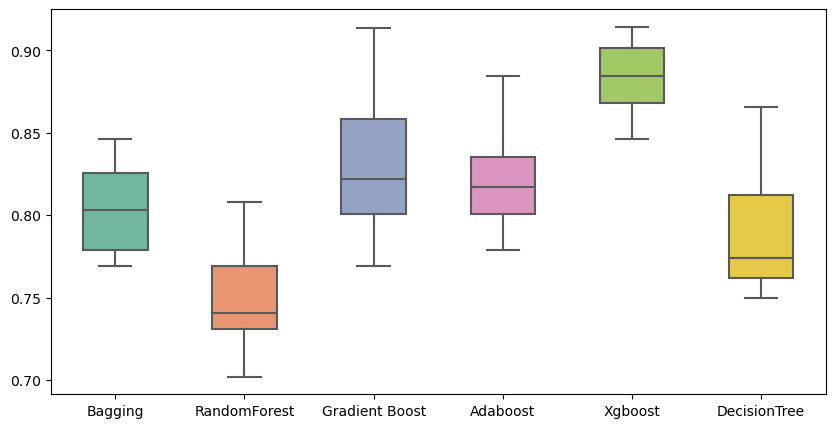

In [51]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(cv_results_main,width=0.5,palette = 'Set2');
ax.set_xticklabels(main_perf_df.index,rotation=0)

plt.show();

#### Conclusion on Base Models

- XGBoost has the highest Recall metrics for validation test and highest CV Score Mean. <br>
- Considering CV scores, GradientBoost model comes second. RF has lowest CV scores
- XGBoost, DT and Random Forest models are all overfit in train
- AdaBoost and DT are low performing models
- Best Base model is XGBoost considering Recall as evaluation metric

## Hyperparameter Tuning 

### Select models

As seen above, Recall Test metrics gives the best idea of how good a model is at classifying whether the customer will churn or not.<br>
Based on above Recall metrics, we will consider below models for tuning:

  - **XGBoost**:
      It has best Recall of 92.8% without up/down sampling<br>
      
   - **AdaBoost**
       It has good Recall of 92.18% (second best) and lowest Train metrics indicating least overfit among the top 3 models<br>
       
  -  **GradientBoost**
       It has Recall of 91.7% (third best without overfitting)<br>
       
  

Tuning will focus on reducing overfit(specially for XGBoost) and improving Recall<br>
   

### Helper Methods

In [52]:
def compare_confusion_matrix(cm1,cm2,title1,title2,labels=None):
    
    '''
          Plot and compare two Confusion Matrices provided
          for side-by-side comparision
          Assumption: two matrices are calculated on the same 
          dataset
          
          Returns: no values

    '''
  

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,8),sharey=True)


    #Using ConfusionMatrixDisplay to plot the Confusion Matrix instead of a HeatMap
    if labels == None:
        disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1) 
        disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2) 
    else:   
        disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=labels) 
        disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=labels) 
   
    #plot the confusion matrix on respective axis
    disp1.plot(ax=ax1,colorbar=False,cmap='Blues') 
    disp2.plot(ax=ax2,colorbar=False,cmap='Blues')
   

    #set the title to each matrix
    ax1.title.set_text(title1)
    ax2.title.set_text(title2)
    
    
    #display the plot
    plt.show()

In [53]:
def evaluate_clf_detail(model,model_label):
    
    '''
        Evaluates the given model and prints the train and test classification reports
        and computes the confusion matrices
        
    
        Returns: the Pandas dataframe containing train and validation metrics 
        and their confusion matrices     
    '''
    
    y_preds_train = model.predict(X_train)
    y_preds = model.predict(X_valid)
    
    
    print(f'{model_label} Training classification report\n')
    print(classification_report(y_train,y_preds_train,target_names=['Not Churn','Churn']))
    print('*'*60)
    print(f'{model_label} Test classification report\n')
    print(classification_report(y_valid,y_preds,target_names=['Not Churn','Churn']))
    
    cm_train = confusion_matrix(y_train,y_preds_train)
    cm_test = confusion_matrix(y_valid,y_preds)
       
    
    perf_df = pd.DataFrame(
        {'Accuracy Train':accuracy_score(y_train,y_preds_train),
         'Precision Train':precision_score(y_train,y_preds_train,average='macro'),
         'Recall Train':recall_score(y_train,y_preds_train,average='macro'),
         'F1 Score Train':f1_score(y_train,y_preds_train,average='macro'),
         'Accuracy Test':accuracy_score(y_valid,y_preds),
         'Precision Test':precision_score(y_valid,y_preds,average='macro'),
         'Recall Test':recall_score(y_valid,y_preds,average='macro'),
         'F1 Score Test':f1_score(y_valid,y_preds,average='macro'),
        
         },
    index=[model_label])
    
    
    return perf_df,cm_train,cm_test

In [54]:
def clf_grid_search(model,param_grid):
    
    '''
        Performs Hyper Parameter tuning using sklearn GridSearchCV
        for the given model and parameter grid using 5 fold (Stratifed-default) Cross Validation 
        
        param_grid is a dictionary where keys are the parameter names
        for the given model and the values are list of possible values that
        need to be considered for the tuning
    
        Prints the Best Score and Parameters combination 
        
        Returns: the best estimator as a result of GridSearchCV
    
    '''
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='recall')
    
    grid_search.fit(X_train, y_train)
    
    print('*'*70)
    print(f'Best Score: {grid_search.best_score_}')    
    print('*'*70)
    print('Best parameters:')
    print(grid_search.best_params_)
    
    
    return grid_search.best_estimator_

### XGBoost  Hyper Parameter Tuning

We will check the parameter values to iprove metrics on the Test Data.
<br>Parameters considered are n_estimators,learning_rate and max_depth

In [55]:
xgb_param_grid={
            'n_estimators':np.arange(100,200,100), 
            'scale_pos_weight':[5,10,15],
            'learning_rate':[0.1,0.15],
            'subsample':[0.6,0.8],
            'gamma':[0,1],           
            'max_depth':np.arange(4,8,2),
            
} 

xgb_model = XGBClassifier(random_state=SEED)

xgb_best = clf_grid_search(xgb_model,xgb_param_grid)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
**********************************************************************
Best Score: 0.9596659919028341
**********************************************************************
Best parameters:
{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 15, 'subsample': 0.6}


#### Base Model Performance

In [56]:
xgb_model.fit(X_train,y_train)
xgb_base_perf_df,xgb_base_train_cm,xgb_base_val_cm = evaluate_clf_detail(xgb_model,'XGBoost Base')

XGBoost Base Training classification report

              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00      5439
       Churn       1.00      1.00      1.00      1041

    accuracy                           1.00      6480
   macro avg       1.00      1.00      1.00      6480
weighted avg       1.00      1.00      1.00      6480

************************************************************
XGBoost Base Test classification report

              precision    recall  f1-score   support

   Not Churn       0.98      0.99      0.98      1360
       Churn       0.93      0.87      0.90       261

    accuracy                           0.97      1621
   macro avg       0.95      0.93      0.94      1621
weighted avg       0.97      0.97      0.97      1621



#### Tuned Model Performance

In [57]:
xgb_best_perf_df,xgb_best_train_cm,xgb_best_val_cm = evaluate_clf_detail(xgb_best,'XGBoost Best')

XGBoost Best Training classification report

              precision    recall  f1-score   support

   Not Churn       1.00      0.95      0.98      5439
       Churn       0.80      1.00      0.89      1041

    accuracy                           0.96      6480
   macro avg       0.90      0.98      0.93      6480
weighted avg       0.97      0.96      0.96      6480

************************************************************
XGBoost Best Test classification report

              precision    recall  f1-score   support

   Not Churn       0.99      0.94      0.96      1360
       Churn       0.75      0.95      0.84       261

    accuracy                           0.94      1621
   macro avg       0.87      0.95      0.90      1621
weighted avg       0.95      0.94      0.94      1621



#### Compare metrics against Base

In [58]:
xgb_perf_df = pd.concat([xgb_base_perf_df,xgb_best_perf_df])
xgb_perf_df

Accuracy Train  Precision Train  Recall Train  F1 Score Train  \
XGBoost Base           1.000            1.000         1.000           1.000   
XGBoost Best           0.960            0.900         0.975           0.932   

              Accuracy Test  Precision Test  Recall Test  F1 Score Test  
XGBoost Base          0.968           0.951        0.928          0.939  
XGBoost Best          0.941           0.870        0.946          0.902

#### Compare Confusion Matrix

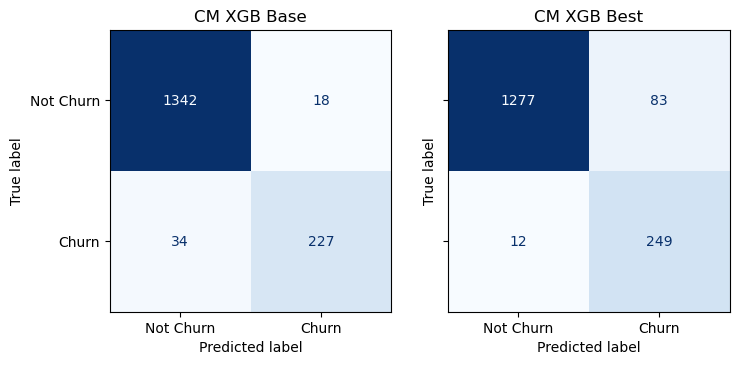

In [59]:
compare_confusion_matrix(xgb_base_val_cm,xgb_best_val_cm,'CM XGB Base','CM XGB Best',labels=['Not Churn','Churn'])

#### Remarks

- After tuning, XGBoost train parameters are reduced by approx 1% indicating overfit has reduced
- Post tuning, Recall has increased by 18%, more positive labels are identified as seen in Confusion Matrix

### AdaBoost  Hyper Parameter Tuning

We will check the parameter values to improve metrics on the Test Data.
<br>Parameters considered are n_estimators and learning_rate

In [60]:
adb_param_grid={
            'n_estimators':np.arange(200,600,100),
            'learning_rate':[0.2,0.25]
    
} 

adb_model = AdaBoostClassifier(random_state=SEED)

adb_best = clf_grid_search(adb_model,adb_param_grid)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
**********************************************************************
Best Score: 0.8319147957305851
**********************************************************************
Best parameters:
{'learning_rate': 0.25, 'n_estimators': 500}


#### Base Model Performance

In [61]:
adb_model.fit(X_train,y_train)
adb_base_perf_df,adb_base_train_cm,adb_base_val_cm = evaluate_clf_detail(adb_model,'AdaBoost Base')

AdaBoost Base Training classification report

              precision    recall  f1-score   support

   Not Churn       0.97      0.98      0.98      5439
       Churn       0.89      0.85      0.87      1041

    accuracy                           0.96      6480
   macro avg       0.93      0.91      0.92      6480
weighted avg       0.96      0.96      0.96      6480

************************************************************
AdaBoost Base Test classification report

              precision    recall  f1-score   support

   Not Churn       0.97      0.98      0.98      1360
       Churn       0.90      0.86      0.88       261

    accuracy                           0.96      1621
   macro avg       0.94      0.92      0.93      1621
weighted avg       0.96      0.96      0.96      1621



#### Tuned Model Performance

In [62]:
adb_best_perf_df,adb_best_train_cm,adb_best_val_cm = evaluate_clf_detail(adb_best,'AdaBoost Best')

AdaBoost Best Training classification report

              precision    recall  f1-score   support

   Not Churn       0.97      0.99      0.98      5439
       Churn       0.92      0.87      0.89      1041

    accuracy                           0.97      6480
   macro avg       0.95      0.93      0.94      6480
weighted avg       0.97      0.97      0.97      6480

************************************************************
AdaBoost Best Test classification report

              precision    recall  f1-score   support

   Not Churn       0.97      0.99      0.98      1360
       Churn       0.92      0.87      0.89       261

    accuracy                           0.97      1621
   macro avg       0.95      0.93      0.94      1621
weighted avg       0.97      0.97      0.97      1621



#### Compare metrics against Base

In [63]:
adb_perf_df = pd.concat([adb_base_perf_df,adb_best_perf_df])
adb_perf_df

Accuracy Train  Precision Train  Recall Train  F1 Score Train  \
AdaBoost Base           0.959            0.933         0.914           0.923   
AdaBoost Best           0.966            0.947         0.925           0.936   

               Accuracy Test  Precision Test  Recall Test  F1 Score Test  
AdaBoost Base          0.962           0.937        0.922          0.929  
AdaBoost Best          0.966           0.947        0.926          0.936

#### Compare Confusion Matrix

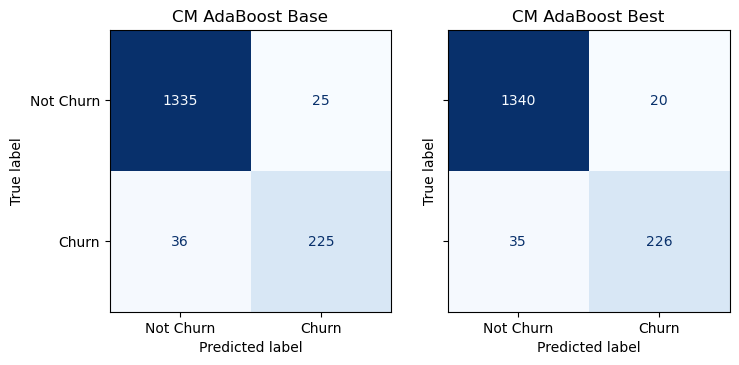

In [64]:
compare_confusion_matrix(adb_base_val_cm,adb_best_val_cm,'CM AdaBoost Base','CM AdaBoost Best',labels=['Not Churn','Churn'])

#### Remarks

- Post tuning, Recall has increased by 4%, more positive labels are identified as seen in Confusion Matrix
- Accuracy increased by 4%

### GradientBoost  Hyper Parameter Tuning

We will check the parameter values to improve metrics on the Test Data.
<br>Parameters considered are n_estimators,learning_rate and max_depth

In [65]:
gb_param_grid={
              
    'n_estimators':np.arange(100,300,100),
     'learning_rate':[0.1,0.15],
    'max_depth':[4,6,8],
} 

gb_model = GradientBoostingClassifier(random_state=SEED)

gb_best = clf_grid_search(gb_model,gb_param_grid)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
**********************************************************************
Best Score: 0.8693503864556498
**********************************************************************
Best parameters:
{'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 200}


#### Base Model Performance

In [66]:
gb_model.fit(X_train,y_train)
gb_base_perf_df,gb_base_train_cm,gb_base_val_cm = evaluate_clf_detail(gb_model,'Gradient Boost Base')

Gradient Boost Base Training classification report

              precision    recall  f1-score   support

   Not Churn       0.98      0.99      0.99      5439
       Churn       0.95      0.90      0.92      1041

    accuracy                           0.98      6480
   macro avg       0.97      0.94      0.95      6480
weighted avg       0.98      0.98      0.98      6480

************************************************************
Gradient Boost Base Test classification report

              precision    recall  f1-score   support

   Not Churn       0.97      0.99      0.98      1360
       Churn       0.95      0.84      0.89       261

    accuracy                           0.97      1621
   macro avg       0.96      0.92      0.94      1621
weighted avg       0.97      0.97      0.97      1621



#### Tuned Model Performance

In [67]:
gb_best_perf_df,gb_best_train_cm,gb_best_val_cm = evaluate_clf_detail(gb_best,'Gradient Boost Best')

Gradient Boost Best Training classification report

              precision    recall  f1-score   support

   Not Churn       1.00      1.00      1.00      5439
       Churn       1.00      1.00      1.00      1041

    accuracy                           1.00      6480
   macro avg       1.00      1.00      1.00      6480
weighted avg       1.00      1.00      1.00      6480

************************************************************
Gradient Boost Best Test classification report

              precision    recall  f1-score   support

   Not Churn       0.98      0.99      0.98      1360
       Churn       0.95      0.88      0.91       261

    accuracy                           0.97      1621
   macro avg       0.97      0.93      0.95      1621
weighted avg       0.97      0.97      0.97      1621



#### Compare metrics against Base

In [68]:
gb_perf_df = pd.concat([gb_base_perf_df,gb_best_perf_df])
gb_perf_df

Accuracy Train  Precision Train  Recall Train  \
Gradient Boost Base           0.976            0.965         0.943   
Gradient Boost Best           0.999            0.998         0.999   

                     F1 Score Train  Accuracy Test  Precision Test  \
Gradient Boost Base           0.954          0.967           0.959   
Gradient Boost Best           0.999          0.973           0.965   

                     Recall Test  F1 Score Test  
Gradient Boost Base        0.917          0.937  
Gradient Boost Best        0.935          0.949

#### Compare Confusion Matrix

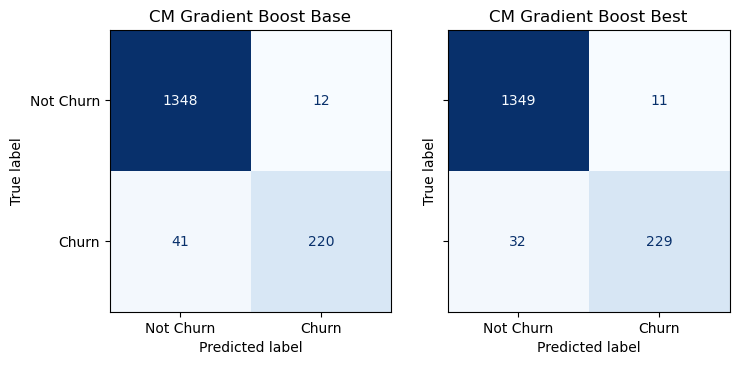

In [69]:
compare_confusion_matrix(gb_base_val_cm,gb_best_val_cm,'CM Gradient Boost Base','CM Gradient Boost Best',
                         labels=['Not Churn','Churn'])

#### Remarks

- Post tuning, Recall has increased by 18%, more positive labels are identified as seen in Confusion Matrix
- Accuracy increased by 6%

## Tuned Models Comparision

In [70]:
#Compare all tuned models metrics, focussed on Recall agianst Validation Set
tuned_perf_df = pd.concat([xgb_best_perf_df,adb_best_perf_df,gb_best_perf_df])
tuned_perf_df.sort_values(by = ['Recall Test'],ascending=False
        ).style.highlight_max(color="lightgreen",subset=['Recall Test'],axis=0
                             ).highlight_min(color="pink", subset=['Recall Test'],axis=0)

#### Remarks

XGBoost has the best Recall and least ovefit among the tuned models. Will be considered for the pipeline

## Final Model - Pipeline and Test Metrics Evaluation

We will build a production like pipeline using the parameters from the XGBoost tuned model.<br>
We will split the given data to train and test to evaluate the pipeline performance

### Data for pipeline

In [71]:
df_pipe = cust_data_df.copy()
df_pipe.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

### Define Pipeline

In [72]:
#STATIC VARIABELES

TEST_SIZE = 0.2
FOLDS = 10
SEED = 42

#manual encoding for target
cust_attrite_map = {'Existing Customer':0,'Attrited Customer':1}

#features to drop, not considered for model
cols_to_drop = ['Customer_Age','Months_on_book','Avg_Open_To_Buy']

#numerical features
num_cols = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
            'Credit_Limit', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Revolving_Bal',
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
#categorical features
cat_cols = ['Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

In [73]:
#Custom Transformers to drop columns
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cols_to_drop=None):
        self.cols_to_drop = cols_to_drop
        
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        
        X.drop(cols_to_drop,axis=1,inplace=True)
              
        return X
    

In [74]:
#helper to evaluate pipeline against test data
def evaluate_clf_pipeline(model,model_label):
    
    '''
        Evaluates the given model and prints the train and test classification reports
        and computes the confusion matrices
        
    
        Returns: the Pandas dataframe containing train and validation metrics 
        and their confusion matrices     
    '''
    
    y_preds_train = model.predict(X_train_pipe)
    y_preds = model.predict(X_test_pipe)
    
    
    print(f'{model_label} Training classification report\n')
    print(classification_report(y_train_pipe,y_preds_train,target_names=['Not Churn','Churn']))
    print('*'*60)
    print(f'{model_label} Test classification report\n')
    print(classification_report(y_test_pipe,y_preds,target_names=['Not Churn','Churn']))
    
    cm_train = confusion_matrix(y_train_pipe,y_preds_train)
    cm_test = confusion_matrix(y_test_pipe,y_preds)
   
    
    perf_df = pd.DataFrame(
        {'Accuracy Train':accuracy_score(y_train_pipe,y_preds_train),
         'Precision Train':precision_score(y_train_pipe,y_preds_train,average='macro'),
         'Recall Train':recall_score(y_train_pipe,y_preds_train,average='macro'),
         'F1 Score Train':f1_score(y_train_pipe,y_preds_train,average='macro'),
         'Accuracy Test':accuracy_score(y_test_pipe,y_preds),
         'Precision Test':precision_score(y_test_pipe,y_preds,average='macro'),
         'Recall Test':recall_score(y_test_pipe,y_preds,average='macro'),
         'F1 Score Test':f1_score(y_test_pipe,y_preds,average='macro'),
        
         },
    index=[model_label])
    
    
    return perf_df,cm_train,cm_test

In [75]:
#split data for pushing to pipeline
X = df_pipe.drop('Attrition_Flag',axis=1)
y = df_pipe['Attrition_Flag'].map(cust_attrite_map)

In [76]:
#Split to train and test, no validation as no CV or tuning is performed here
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X,y, random_state = SEED, 
                                                                        stratify = y, test_size=0.2)


In [77]:
#create individual pipelines
drop_transformer = Pipeline(steps = [
    ('drop_features',DropColumns(cols_to_drop))
])


#impute null values with median and scale for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#impute null values with 'Unknown' and One Hot Encode for categorical columns
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#preprocessor pipeline combines all the above
preprocessor = ColumnTransformer(
    transformers=[
        ('drop_cols',drop_transformer,cols_to_drop),     
        ('num', numeric_transformer, num_cols),       
        ('cat', cat_transformer, cat_cols )
    ])

#set parameters as per tuned model
xgb_model = XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 100, 
                          gamma = 0, subsample= 0.6, scale_pos_weight = 15, random_state=SEED)


#final pipeline
model_pipe = Pipeline(steps=[
    ('preprocess',preprocessor),
    ('xgb_model',xgb_model)
])

In [78]:
model_pipe.fit(X_train_pipe,y_train_pipe)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('drop_cols',
                                                  Pipeline(steps=[('drop_features',
                                                                   DropColumns(cols_to_drop=['Customer_Age',
                                                                                             'Months_on_book',
                                                                                             'Avg_Open_To_Buy']))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Avg_Open_To_Buy']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Dependen...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [79]:
perf_df,cm_train,cm_test = evaluate_clf_pipeline(model_pipe,'Pipe')

Pipe Training classification report

              precision    recall  f1-score   support

   Not Churn       1.00      0.95      0.97      6799
       Churn       0.79      1.00      0.88      1302

    accuracy                           0.96      8101
   macro avg       0.90      0.97      0.93      8101
weighted avg       0.97      0.96      0.96      8101

************************************************************
Pipe Test classification report

              precision    recall  f1-score   support

   Not Churn       0.99      0.94      0.96      1701
       Churn       0.75      0.95      0.84       325

    accuracy                           0.94      2026
   macro avg       0.87      0.95      0.90      2026
weighted avg       0.95      0.94      0.94      2026



#### Metrics

In [80]:
perf_df

Accuracy Train  Precision Train  Recall Train  F1 Score Train  \
Pipe           0.957            0.895         0.974           0.928   

      Accuracy Test  Precision Test  Recall Test  F1 Score Test  
Pipe          0.941           0.869        0.946          0.901

#### Confusion Matrix - Train vs Test

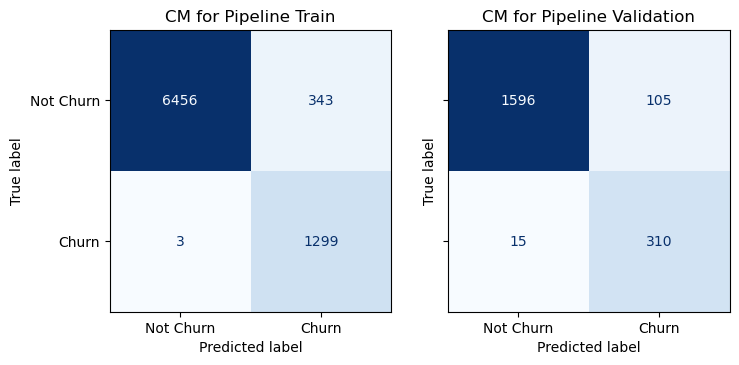

In [81]:
compare_confusion_matrix(cm_train,cm_test,'CM for Pipeline Train','CM for Pipeline Validation',
                         labels=['Not Churn','Churn'])

#### Remark:

Pipeline Model is at a Recall of 94.6% and Accuracy of 94.1%.<br>
Metrics are Well balanced against train and test data implying there is no overfit

### Save the model

In [84]:
import joblib
filename = 'cc_models/churn_pred_model.sav'
joblib.dump(model_pipe,filename)

['cc_models/churn_pred_model.sav']

## Insights

As per the above analysis and findings, credit card customers with below attributes are higher risk of leaving the bank:

- Have less relations with the bank
- less number of transactions in last 12 months
- Transactions of lower amounts in last 12 months
- Inactive for more than 2 months
- Customers with Average Utlization Ratio = 0 (customers who do not use credit cards)
- Income category less than 40K
- Blue Card category
    
    
The bank should work on above points and come up with focused campaigns to retain customers who are likely to attrite.<br>
Some suggestion are mentioned in next section.

## Recommendations

- Bank should offer an increase on credit limit for customers who use credit card in a regular manner.This will increase number of transactions and amount spent<br><br>

- Bank should connect with customers more often and inform about offer and schemes to increase relationship with the bank<br><br>

- Bank should offer cashback offers which will increase credit card transactions<br><br>

- Bank should reach out to customers who have been inactive for a month with customised offers to increase their chance of using credit cards<br><br>

- Bank can offer discounted upgrade from Blue category to Silver cards for high income/ high spend customers<br><br>

- Bank can offer 0% EMI on credit cards to encourage suitable customers to buy higher cost products using their credit cards. This will increase Utilization Ratio as well as transaction amount<br>


- Bank can look at offering suitable schemes to eligible dependents of customers. This will lead to new business